# **Cyfrowe Przetwarzanie Sygnałów**

**Laboratorium nr 4 FFT - szybka transformata Fouriera**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat

Matlab->Python: Michał Maj

---

## **1a. FFT składane od drugiego poziomu "motylków" (2pkt)**

*Wykonaj zadanie **1a** jeżeli Twój numer indeksu jest **parzysty**, w przeciwnym wypadku wybierz **1b**.*

Złożoność obliczeniowa $N$-punktowej transformaty DFT określonej zależnością:

$$\tag{1}
X(k)=\sum_{n=0}^{N-1} x(n)W^{-kn}_{N}; k=0,1,2,...,N-1; \\
W_N=e^{j\frac{2\pi}{N}}
$$

to $O(N^2)$. Jedno zespolone $N$-punktowe DFT można wykonać w następujący sposób:

$$\tag{2}
X(k) = X_1(k) + X_2(k)
$$

$$\tag{3}
X(k) = \sum^{\frac{N}{2}-1}_{n=0} x(2n)W^{-k(2n)}_N + \sum^{\frac{N}{2}-1}_{n=0} x(2n+1)W^{-k(2n+1)}_N; k = 0, 1, 2, ..., N-1
$$

$$\tag{4}
W^{-2kn}_N = W^{-kn}_\frac{N}{2}
$$

$$\tag{5}
X(k) = \left( \sum^{\frac{N}{2}-1}_{n=0} x(2n)W^{-kn}_\frac{N}{2} \right) + W^{-k}_N \left( \sum^{\frac{N}{2}-1}_{n=0} x(2n+1)W^{-kn}_\frac{N}{2}\right); k = 0, 1, 2, ..., N-1
$$

Zauważ, że obliczenia w nawiasach z (5) to transformata DFT (1) o długości $N/2$, więc zależność  można zapisać:

$$
X(k)=DFT(x(2n))+W_N^{−k}DFT(x(2n+1)); k=0,1,2,...,\frac{N}{2}−1
$$

$$\tag{6}
X\left(k + \frac{N}{2}\right)=DFT(x(2n))+W_N^{-(k+\frac{N}{2})}DFT(x(2n+1)); k=0,1,2,...,\frac{N}{2}−1
$$

Złożoność obliczeniowa wzoru (1) to $O(N^p)$ natomiast złożoność (6) jest mniejsza i wynosi $2*O((N/2)^2)$. Dokładny opis znajdziesz w TZ, podrozdział 9.5.1, równania (9.35)-(9.40).

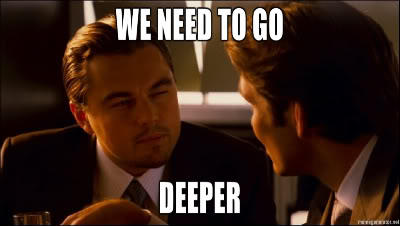

I teraz wszystko staje się jasne ;-) Schemat przedstawiony od (2) do (6) można zastosować do (6) i dalej, głębiej, aż do momentu, gdy wektor wejściowy $x$ będzie składał się tylko dwóch próbek.

Wygeneruj sygnał $x$, losowy, o długości 1024 próbek. Oblicz $X$ za pomocą funkcji DFT `np.fft.fft(...)`. Następnie wyznacz $X_{fft}$ za pomocą (6): $X_{fft}=X_1+cX_2$, dodając do siebie osobno obliczone widma DFT próbek parzystych i nieparzystych (te drugie z korektą $c$). Następnie widma $X_1$ oraz $X_2$ wyznacz ponownie za pomocą (2): $X_1=X_{11}+cX_{12}$ , $X_2=X_{21}+cX_{22}$  (czyli podziel próbki o numerach parzystych na te o numerach parzystych i nieparzystych, podobnie zrób z próbkami o numerach nieparzystych). Zauważ, że $X_{fft}$ oraz $X$ ma długość 1024, $X_1$ i $X_2$ to wektory o długości  512 natomiast $X_{11}$, $X_{12}$, $X_{21}$, $X_{22}$  mają długość 256 próbek.

Porównaj czy wynik uzyskany we wszystkich 3 sposobach jest taki sam.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024
x = np.random.rand(N)

# ...

## **1b. FFT za pomocą rekurencji (2 pkt)**

*Wykonaj zadanie **1b** jeżeli Twój numer indeksu jest **nieparzysty**, w przeciwnym wypadku wybierz **1a**.*

Złożoność obliczeniowa transformacji DFT $N$-punktowej to $O(N^p)$. Jedno zespolone $N$-punktowe DFT można wykonać jako złożenie dwóch $N/2$-punktowych DFT (plus pewne obliczenia związane ze "składaniem") co skutkuje obniżeniem złożoności do $2*O((N/2)^2)$. Następnie można rozbić obliczenia na cztery $N/4$-punktowe DFT. Dla $N=2^p$ można zejść w ten sposób do wielu DFT o długości $N=2$.

Poniższa funkcja realizuje zespoloną transformację Fouriera poprzez podział w dziedzinie czasu DIT (ang. Decimation in Time).


In [ ]:
import numpy as np

def dit(x):
  N = len(x)
  if N == 1:   # warunek konczacy rekurencje
    return x
  else:
    X1 = dit(x[0::2])
    X2 = dit(x[1::2])
    Z = np.exp(-2j * np.pi * np.arange(N) / N)
    X = np.concatenate([X1 + Z[:N // 2] * X2, X1 + Z[N // 2:] * X2])
    return X

Działanie funkcji można zweryfikować programem:

In [ ]:
N = 1024
x = np.random.rand(N)
X_fft = np.fft.fft(x)   # oryginalne DFT
X_dit = dit(x)          # DFT sklejane z dwóch połówek (1 etap podziału)

print("Błąd DFT - DiT: ", np.mean(np.abs(X_fft-X_dit)));

Funkcja `dit(...)` wykonuje tylko pierwszy z $p$ etapów podziału. Każdy następny etap powinien być wykonany na zmiennej `X1` i `X2`. Wykorzystując `dit(...)` zaimplementuj algorytm radix-2 DIT FFT dla długości $N=2^p$. Wykorzystaj rekurencję.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ...

## **2. Transformata Fouriera sygnałów rzeczywistych (3 pkt)**

Transformata DFT jest zespolona, jednak często transformacji poddaje się sygnały rzeczywiste np.: dźwięk, zdjęcia cyfrowe, etc... Dlatego, aby jeszcze bardziej przyspieszyć działanie tego algorytmu można wykorzystać symetrię widma i:
1. wykonać dwie $N$ - puntkowe transformacje rzeczywistego sygnału za pomocą jednej $N$ - punktowej transformaty zespolonej lub
2. wykonać jedną $N$ - punktową transformacje rzeczywistego sygnału za pomocą $N/2$ - punktowej transformaty zespolonej.

Jeżeli przedostatnia cyfra numeru Twojej legitymacji studenckiej jest liczbą nieparzystą wykonaj pierwszy punkt, jeżeli jest parzysta wybierz punkt drugi. Przyjmij $N=1024$, wygeneruj losowe dane o rozkładzie normalnym, wykonaj transformatę rzeczywistą a następnie porównaj otrzymane wyniki do transformaty zespolonej. Jakie przyspieszenie algorytmu uzyskałeś tą metodą?

Dodatkowe przyspieszenie transformcji Fouriera sygnałów rzeczywistych wykorzystuje właściwość symetrii widma: dla rzeczywistego sygnału $x(n)$, $n=0,1,2,…,N-1$, jego transformata $X(k), k=0,1,2,…,N-1$ ma następującą właściwość:

$$
X(k)=X^{*}(N−k); k=1,2,...,N−1
$$

czyli:

$$
Re\{X(k)\} = Re\{X(N-k)\}, \quad Im\{X(k)\}=-Im\{X(N-k)\}, \quad k=1,2,...,N-1
$$

Dlatego, dla dwóch niezależnych sygnałów (**punkt 1**) $x_1(n)$ i $x_2(n)$, $n=0,1,2,...,N-1$, można uzyskać ich transformaty Fouriera w następujący sposób:

$$
y(n)=x_1(n)+jx_2(n); \\
Y=fft(y)
$$

wykorzystując symetrię widma względem $k=N/2$ można "odzyskać" transformaty Fouriera sygnałów $x_1$ i $x_2$ w następujący sposób:

$$
X_{1r}(k) = 0.5(Y_r(k)+Y_r(N-k)),\quad X_{1i}(k) = 0.5(Y_i(k)-Y_i(N-k)) \\
X_{2r}(k) = 0.5(Y_i(k)+Y_i(N-k)), \quad X_{2i}(k) = 0.5(Y_r(N-k)-Y_r(k)) \\
k=1,2,3,...,N-1
$$

gdzie $Y_r$ i $Y_i$ to odpowiednio część rzeczywista i urojona wektora $Y$, podobnie jak $X_{1r}$, $X_{1i}$, $X_{2r}$ i $X_{2i}$ są odpowiednio częścią rzeczywistą i urojoną wektoów $X_1$ i $X_2$. Zerowe prążki widma odzyskuje się następująco:

$$
X_{1r}(0)=Y_r(0), \quad X_{1i}(0)=0; \\
X_{2r}(0)=Y_i(0), \quad X_{2i}(0)=0;
$$

Ostatecznie, transformaty Fouriera wektorów $x_1$ i $x_2$ uzyskuje się łącząc wektory:

$$
X_1=X_{1r}+jX_{1i} \\
X_2=X_{2r}+jX_{2i}
$$

Wersja alternatywna (**punkt 2**) polega na wyznaczeniu $N$-punktowego sygnału rzeczywistego za pomocą pojedynczej $N/2$-punktowej FFT:

niech $y(n)=x(2n)+jx(2n+1), n=0,1,2,...,N/2-1$ a $Y$ to transformata Fouriera $y$ o długości $N/2$. Wtedy operację $X=fft(x)$ można otrzymać w dwóch krokach:

$$\tag{1}
X(k)=\frac{1}{2}\biggl[ Y(k)+Y^{*}\left(\frac{N}{2}−k \right) \biggr] +\frac{1}{2}j e^{−\frac{j2\pi k}{N}}\biggl[Y^{*}\left(\frac{N}{2}−k\right)−Y(k)\biggr], \quad k=1,2,3,...,N/2-1
$$

Widmo dla $k=\frac{N}{2},\frac{N}{2}+1,...,N-1$ jest sprzężone, symetryczne do pierwszej połówki. Załóż, że $Y(513)=Re(Y(0))-Im(Y(0))$.

$$\tag{2}
X(0)=Re\{Y(0)\}+Im\{Y(0)\}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ...

## **3. Implementacja algorytmu radix-2 (opcja, +1 pkt)**

Wygeneruj w Pythonie zespolony wektor $x$ o rozmiarze 1x1024, charakterze losowym (rozkład normalny) oraz nieskorelowanej części rzeczywistej i urojonej. Zapisz go w formacie Matlaba do pliku `x.mat` oraz w formacie w który odczytasz w języku C/C++ (plik `xcpp.dat`).

Napisz program (w języku Python) o nazwie `myFFT`, który wczyta `x.mat` oraz `xcpp.dat` wykona transformatę Fouriera obu sygnałów uzyskując $X_1$ oraz $X_2$. Porównaj oba wyniki. Jeżeli są istotnie różne to oznacza, że utraciłeś część informacji podczas zapisu do pliku `xcpp.dat` - skoryguj ten błąd.

Napisz program w języku C/C++ implementujący szybką transformatę Fouriera (FFT) za pomocą algorytmu *radix-2* w dwóch wersjach - na zmiennych typu `float` oraz `double`. Następnie wczytaj sygnał $x$ z pliku `xcpp.dat`, wykonaj transformację sygnału w precyzji `float` oraz `double`, zapisz wyniki w oddzielnych plikach, w formacie który będziesz mógł odczytać w środowisku Python.

W języku Python, wczytaj transformacje wykonane w języku C/C++ i porównaj wynik do wzorcowej implementacji fransformaty Fouriera wykonanej w języku Matlab (wektor $X_1$).

Wykorzystaj opis algorytmu *radix-2* z wykładu.

## **4. Porównanie implementacji C/C++ z biblioteką fftw (opcja, +0.5 pkt)**

Wykorzystując dane z punktu 3 wykonaj dodatkowo transformację FFT za pomocą biblioteki fftw (www.fftw.org). Sprawdź poprawność wyników w wersji `float` i `double`. Załóż algorytm Matlaba jako wzorcowy (pamiętaj o potencjalnych różnicach w skalowaniu wyniku transformaty!).

Oblicz czas wykonywania Twojej implementacji i implementacji z biblioteki fftw. Do obliczeń użyj funkcji `gettimeofday(...)` pod systemem Linux. Dyskusja na temat wyznaczania czasu krótkich procedur oraz optymalizacji kodu zawarta została w konspekcie do laboratorium 02 przedmiotu  TowNiT. Do czasu wykonania procedury FFT z biblioteki fftw nie wliczaj tzw. "planu".
